# Regresión de modelos lineales

Ignacio Díaz Blanco, Universidad de Oviedo, 2023

Ejemplo básico de regresión lineal 1D, lo haremos de dos formas con idéntico resultado:
- mediante método `Ridge()` de la librería `scikit-learn`
- directamente a partir de la expresión con las matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generación de datos para el ejemplo

Generamos un conjunto de $N$ datos $(x,y)$, donde $x\in \mathbb R^1, y\in \mathbb R^1$ linealmente relacionados
$$
y = a x + b + \epsilon
$$
con una incertidumbre $\epsilon$ que puede representar ruido en el sensor $y$

In [2]:
# Número de datos del ejemplo
N = 1000;

# Coeficientes del modelo
a = 1; b = 1;

# variables de entrada o regresores
x = np.random.randn(N,1);

# errores o ruido de sensor
epsilon = 0.5*np.random.randn(N,1);

# variable de respuesta generada con el modelo (incluyendo ruido)
y = a*x + b + epsilon;


## Entrenamiento del modelo (scikit learn)
Utilizamos la clase `Ridge()` de `scikit-learn`, que simplifica las operaciones y además unifica el procedimiento, que es el mismo para otros métodos.

In [3]:
# importamos la clase Ridge
from sklearn.linear_model import Ridge

# creamos la matriz X que usa sklearn (muestras,atributos)
X = np.column_stack((x,))

# definimos un modelo lineal para entrenamiento con Ridge regression
model = Ridge(alpha=0.00001)

# ajustamos el modelo
model.fit(X,y)

# podemos obtener los coeficientes del modelo
print('valores estimados: ')
print(f'coeficientes = {model.coef_}')
print(f'término independiente = {model.intercept_}')

valores estimados: 
coeficientes = [[1.00178405]]
término independiente = [0.98789443]


### Inferencia
Utilizamos el modelo para realizar la inferencia de $y$ a partir de datos $x$ de test. Evaluamos el modelo con datos de $x$ equiespaciados, comprendidos entre dos valores (ej. $-5$ y $5$)

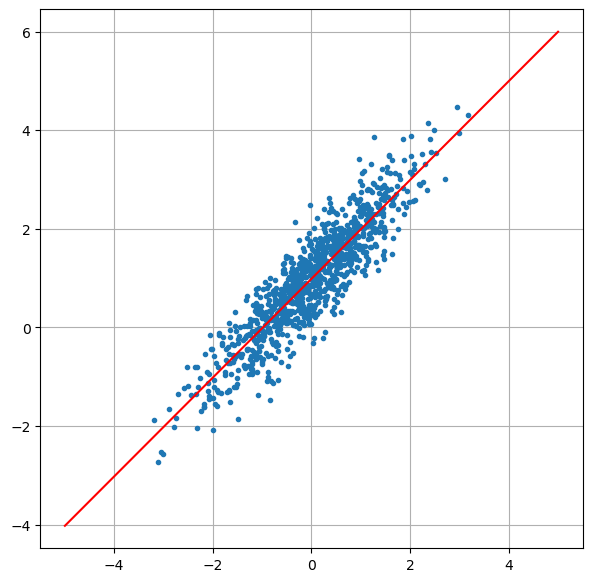

In [4]:
# datos de test
Xtest = np.linspace(-5,5,1000)[:,np.newaxis];

# predicción
ytest = model.predict(Xtest)

# visualización gráfica de los resultados
plt.figure(1,figsize=(7,7))
plt.plot(x,y,'.');
plt.plot(Xtest,ytest,'r')
plt.axis('equal');
plt.grid('on');

## Estimación del modelo con la expresión matricial

Estimamos el modelo utilizando la expresión

$$
\hat {\mathbf W} = (\mathbf X^T \mathbf X - \lambda\mathbf I)^{-1}\mathbf X^T\mathbf Y
$$

tomando la matriz de regresores los valores de $x$ con una columna extra de $1's$ que permite obtener el término independiente en el modelo 
 
$$
\mathbf X = 
\left(
\begin{matrix}
x^1_1 & 1 \\
x^2_1 & 1 \\
\vdots\\
x^n_1 & 1 \\
\end{matrix}
\right)
\qquad
\mathbf Y = 
\left(
\begin{matrix}
y^1 \\
y^2 \\
\vdots \\
y^n \\
\end{matrix}
\right)
\qquad 
{\rm de\; forma\; que}
\qquad
\mathbf Y = \mathbf X\mathbf W
\qquad
{\rm donde}
\qquad
\mathbf W = \left[a\; b\right]
$$


In [5]:
alpha = 0.00001
X = np.column_stack((x,np.ones(N)))
Y = np.column_stack((y,))
W = np.linalg.inv(X.T@X + alpha*np.eye(2))@X.T@Y

# podemos obtener los coeficientes del modelo
print('valores estimados: ')
print(f'coeficientes = {W[0]}')
print(f'término independiente = {W[1]}')

valores estimados: 
coeficientes = [1.00178405]
término independiente = [0.98789442]


sale lo mismo.

<p class=""><a href="http://creativecommons.org/licenses/by-sa/4.0/"><img src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" style="border-width:0"></a><br><span>Ejemplo de Regresión 1D</span> by <a href="http://isa.uniovi.es/~idiaz">Ignacio Díaz Blanco</a> is licensed under a <a href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.</p>